In [1]:
# 📌 Cell: Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Check if SIFT is available
sift = cv2.SIFT_create()


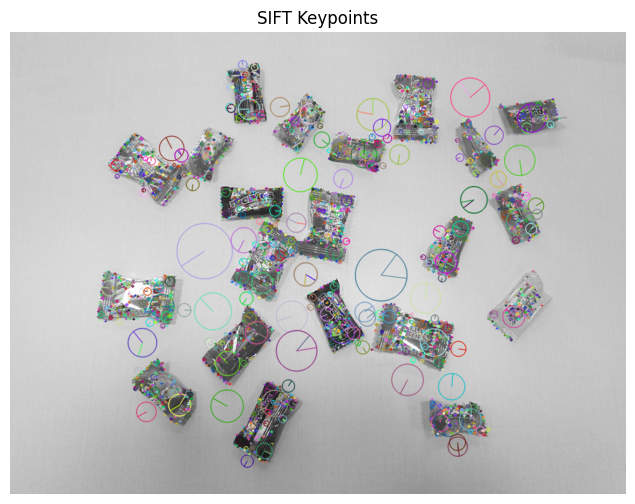

In [5]:
# 📌 Cell: Load and preprocess image
image = cv2.imread('sample.jpg')  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
img_with_keypoints = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


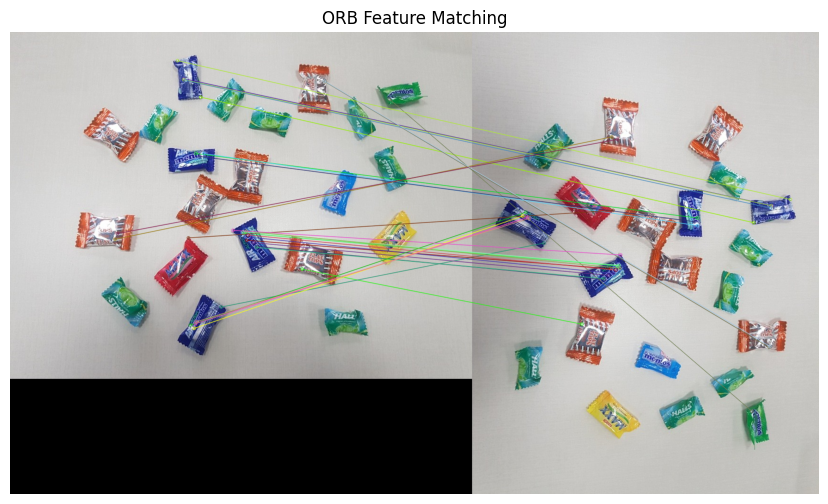

In [6]:
# 📌 Cell: ORB and BFMatcher
orb = cv2.ORB_create()

# Detect ORB keypoints and descriptors
kp1, des1 = orb.detectAndCompute(gray, None)
# Simulate second image as a rotated version (or load another image)
image2 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Brute-Force Matcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 30 matches
matched_img = cv2.drawMatches(image, kp1, image2, kp2, matches[:30], None, flags=2)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('ORB Feature Matching')
plt.axis('off')
plt.show()


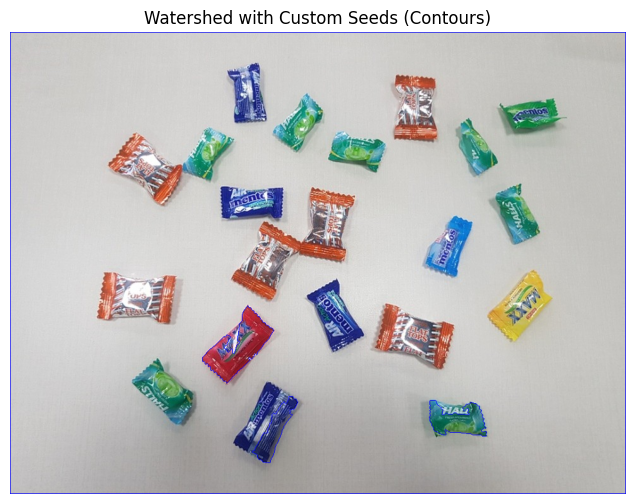

In [7]:
# 📌 Cell: Watershed segmentation with contours
img = cv2.imread('sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Red boundaries

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed with Custom Seeds (Contours)')
plt.axis('off')
plt.show()


In [8]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and normalize
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Resize and reshape (28x28x1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print("Shape:", x_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape: (60000, 28, 28, 1)


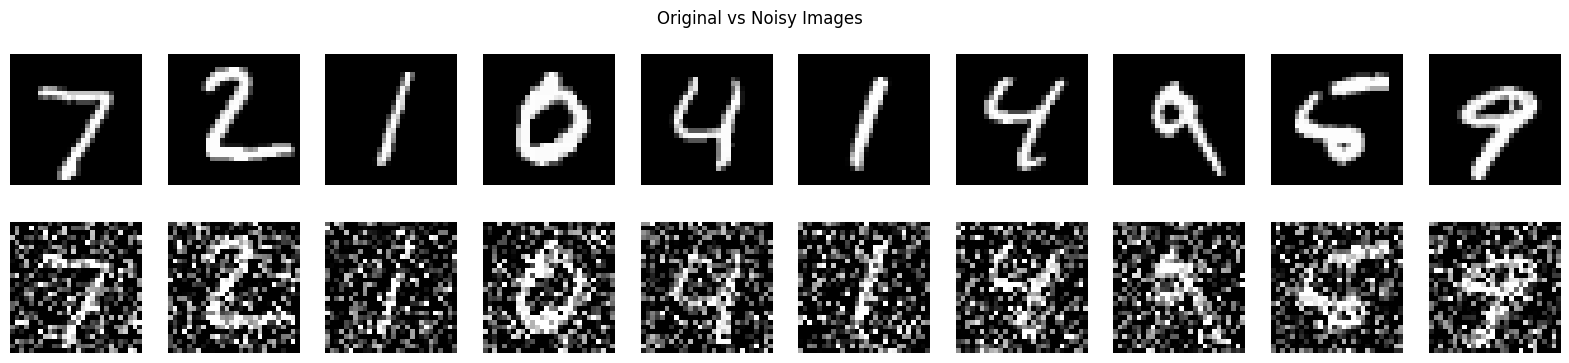

In [9]:
# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Show sample noisy vs original
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # display noisy
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.suptitle("Original vs Noisy Images")
plt.show()


In [10]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.1187 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1116 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1120 - val_loss: 0.1140


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Average PSNR over 100 samples: 10.231112546115565


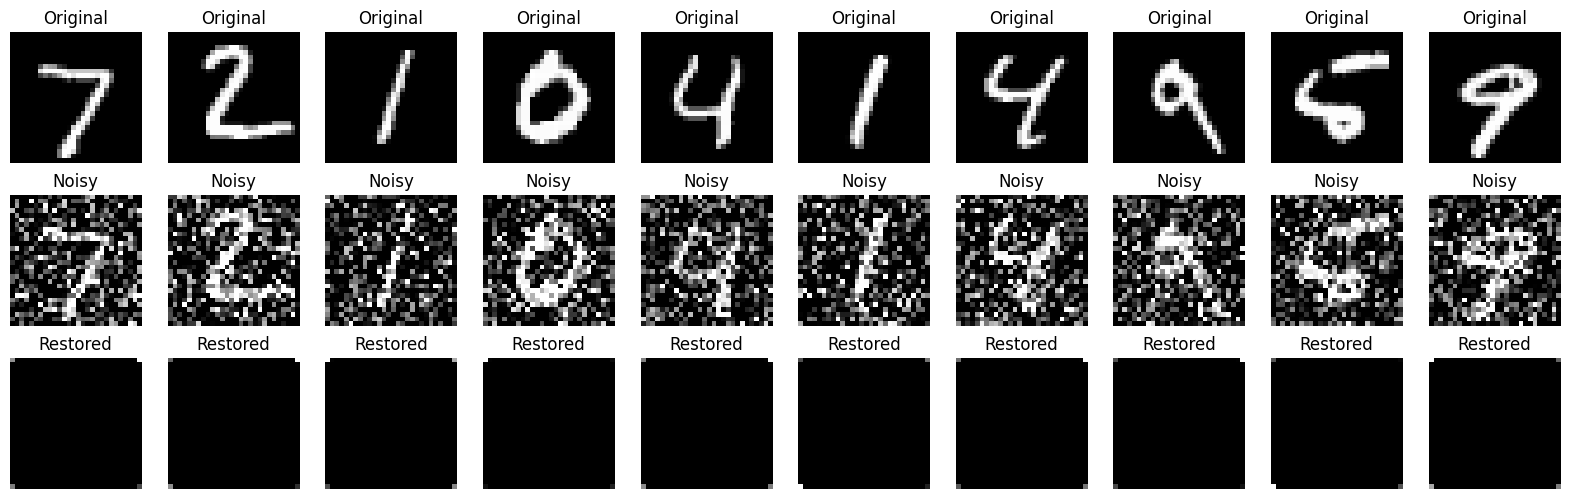

In [12]:
from skimage.metrics import peak_signal_noise_ratio as psnr

# Predict restored images
restored = autoencoder.predict(x_test_noisy)

# Evaluate PSNR
psnr_score = np.mean([psnr(x_test[i], restored[i]) for i in range(100)])
print("Average PSNR over 100 samples:", psnr_score)

# Plot original, noisy, and restored
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # restored
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(restored[i].reshape(28, 28), cmap="gray")
    plt.title("Restored")
    plt.axis("off")
plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load and normalize MNIST
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1).astype("float32")

BUFFER_SIZE = 60000
BATCH_SIZE = 128

train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [14]:
# Generator
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [15]:
# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + \
           cross_entropy(tf.zeros_like(fake_output), fake_output)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
gen_losses = []
disc_losses = []

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        g_loss_epoch = 0
        d_loss_epoch = 0
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            g_loss_epoch += g_loss
            d_loss_epoch += d_loss
        gen_losses.append(g_loss_epoch / len(dataset))
        disc_losses.append(d_loss_epoch / len(dataset))
        print(f'Epoch {epoch+1}, Gen Loss: {g_loss_epoch:.4f}, Disc Loss: {d_loss_epoch:.4f}')

train(train_dataset, EPOCHS)


Epoch 1, Gen Loss: 361.5785, Disc Loss: 551.2115
Epoch 2, Gen Loss: 400.4392, Disc Loss: 581.9943
Epoch 3, Gen Loss: 414.4780, Disc Loss: 586.1202
Epoch 4, Gen Loss: 392.9807, Disc Loss: 607.2585
Epoch 5, Gen Loss: 436.2483, Disc Loss: 571.7130
Epoch 6, Gen Loss: 423.9850, Disc Loss: 583.0302
Epoch 7, Gen Loss: 466.9080, Disc Loss: 540.5392
Epoch 8, Gen Loss: 508.0910, Disc Loss: 518.9911
Epoch 9, Gen Loss: 537.7549, Disc Loss: 501.0202
Epoch 10, Gen Loss: 533.3714, Disc Loss: 505.2210
Epoch 11, Gen Loss: 549.7781, Disc Loss: 499.5043
Epoch 12, Gen Loss: 567.2570, Disc Loss: 485.5287
Epoch 13, Gen Loss: 562.7676, Disc Loss: 501.7109
Epoch 14, Gen Loss: 554.7914, Disc Loss: 510.9691
Epoch 15, Gen Loss: 515.3748, Disc Loss: 540.5883
Epoch 16, Gen Loss: 498.5966, Disc Loss: 549.4920
Epoch 17, Gen Loss: 480.9305, Disc Loss: 558.8517
Epoch 18, Gen Loss: 480.5070, Disc Loss: 557.5609
Epoch 19, Gen Loss: 465.9291, Disc Loss: 571.5618
Epoch 20, Gen Loss: 448.7601, Disc Loss: 576.6467
Epoch 21,

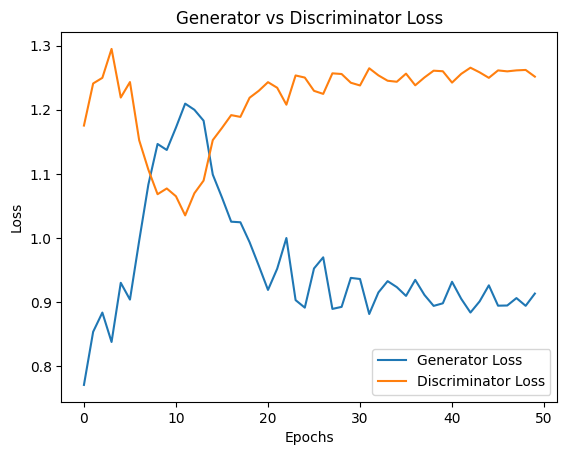

In [17]:
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator vs Discriminator Loss')
plt.show()


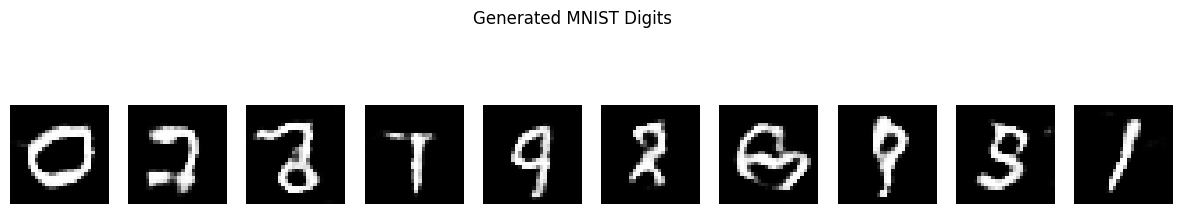

In [18]:
# Generate digits
sample_noise = tf.random.normal([10, noise_dim])
generated_images = generator(sample_noise, training=False)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
plt.suptitle("Generated MNIST Digits")
plt.show()


In [19]:
# Load CIFAR-10
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (_, _) = cifar10.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalize to [-1, 1]

BATCH_SIZE = 128
BUFFER_SIZE = 50000

cifar_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
# CIFAR Generator
def make_cifar_generator():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((8, 8, 256)),

        layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# CIFAR Discriminator
def make_cifar_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[32, 32, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model


In [21]:
cifar_generator = make_cifar_generator()
cifar_discriminator = make_cifar_discriminator()

g_opt = tf.keras.optimizers.Adam(1e-4)
d_opt = tf.keras.optimizers.Adam(1e-4)

gen_losses_cifar = []
disc_losses_cifar = []

@tf.function
def train_step_cifar(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
        generated = cifar_generator(noise, training=True)

        real_output = cifar_discriminator(images, training=True)
        fake_output = cifar_discriminator(generated, training=True)

        g_loss = generator_loss(fake_output)
        d_loss = discriminator_loss(real_output, fake_output)

    g_grads = g_tape.gradient(g_loss, cifar_generator.trainable_variables)
    d_grads = d_tape.gradient(d_loss, cifar_discriminator.trainable_variables)

    g_opt.apply_gradients(zip(g_grads, cifar_generator.trainable_variables))
    d_opt.apply_gradients(zip(d_grads, cifar_discriminator.trainable_variables))

    return g_loss, d_loss

def train_cifar(dataset, epochs):
    for epoch in range(epochs):
        g_loss_epoch = 0
        d_loss_epoch = 0
        for batch in dataset:
            g_loss, d_loss = train_step_cifar(batch)
            g_loss_epoch += g_loss
            d_loss_epoch += d_loss
        gen_losses_cifar.append(g_loss_epoch / len(dataset))
        disc_losses_cifar.append(d_loss_epoch / len(dataset))
        print(f"[CIFAR] Epoch {epoch+1}, Gen Loss: {g_loss_epoch:.4f}, Disc Loss: {d_loss_epoch:.4f}")

train_cifar(cifar_dataset, 50)


[CIFAR] Epoch 1, Gen Loss: 519.8487, Disc Loss: 364.0464
[CIFAR] Epoch 2, Gen Loss: 702.6918, Disc Loss: 267.1344
[CIFAR] Epoch 3, Gen Loss: 724.9497, Disc Loss: 303.0213
[CIFAR] Epoch 4, Gen Loss: 774.7617, Disc Loss: 259.9618
[CIFAR] Epoch 5, Gen Loss: 646.3226, Disc Loss: 340.0620
[CIFAR] Epoch 6, Gen Loss: 580.1205, Disc Loss: 356.4165
[CIFAR] Epoch 7, Gen Loss: 521.1368, Disc Loss: 369.6871
[CIFAR] Epoch 8, Gen Loss: 584.8966, Disc Loss: 357.4462
[CIFAR] Epoch 9, Gen Loss: 615.7921, Disc Loss: 330.4035
[CIFAR] Epoch 10, Gen Loss: 542.2188, Disc Loss: 369.8593
[CIFAR] Epoch 11, Gen Loss: 536.6454, Disc Loss: 403.8794
[CIFAR] Epoch 12, Gen Loss: 520.5367, Disc Loss: 406.2549
[CIFAR] Epoch 13, Gen Loss: 498.3018, Disc Loss: 419.4567
[CIFAR] Epoch 14, Gen Loss: 475.1590, Disc Loss: 429.5677
[CIFAR] Epoch 15, Gen Loss: 462.3330, Disc Loss: 433.7664
[CIFAR] Epoch 16, Gen Loss: 495.7608, Disc Loss: 408.3701
[CIFAR] Epoch 17, Gen Loss: 456.2733, Disc Loss: 442.2277
[CIFAR] Epoch 18, Gen L

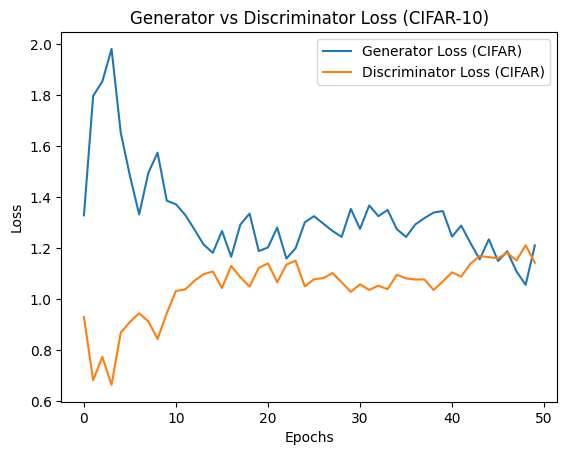

In [22]:
plt.plot(gen_losses_cifar, label='Generator Loss (CIFAR)')
plt.plot(disc_losses_cifar, label='Discriminator Loss (CIFAR)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator vs Discriminator Loss (CIFAR-10)')
plt.show()


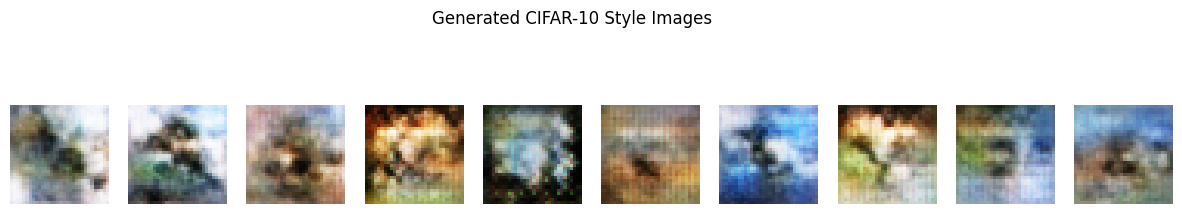

In [23]:
# Generate images
cifar_noise = tf.random.normal([10, 100])
cifar_generated = cifar_generator(cifar_noise, training=False)

# Plot
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = (cifar_generated[i].numpy() + 1) / 2  # De-normalize
    plt.imshow(img)
    plt.axis("off")
plt.suptitle("Generated CIFAR-10 Style Images")
plt.show()